# Algebraic Study of TC

This notebook is used to Study the Code Structure of the Toric Code with it's anyon short strings!

In [30]:
from sage.all import *
import sys
sys.path.append('../')
from AdditionalStructure.Python.NewClasses import *
from AdditionalStructure.Python.HelperTools import *
from matplotlib import animation
from IPython.display import HTML


Define the gauge group of our Toric Codes setups in terms SAGE can understand:

In [31]:
L = 10

Model = ToricCode(L)
G_TC = Model.stabilisers
G_full = Model.stabilisers + Model.electrons + Model.fermions
G_fermion = Model.stabilisers + Model.fermions

In [32]:
id = matrix.identity(GF(2), Model.system.nbits)
w = block_matrix([[matrix(Model.system.nbits, Model.system.nbits), id], [id, matrix(Model.system.nbits, Model.system.nbits)]])

G_TC_mat = matrix(GF(2), G_TC, sparse=False)
G_full_mat = matrix(GF(2), G_full, sparse=False)
G_fermion_mat = matrix(GF(2), G_fermion, sparse=False)

In [33]:
centralizer_full = (G_full_mat * w).right_kernel()
center_full = centralizer_full.intersection(G_full_mat.row_space())

centralizer_fermion = (G_fermion_mat * w).right_kernel()
center_fermion = centralizer_fermion.intersection(G_fermion_mat.row_space())

centralizer_TC = (G_TC_mat * w).right_kernel()
center_TC = centralizer_TC.intersection(G_TC_mat.row_space())

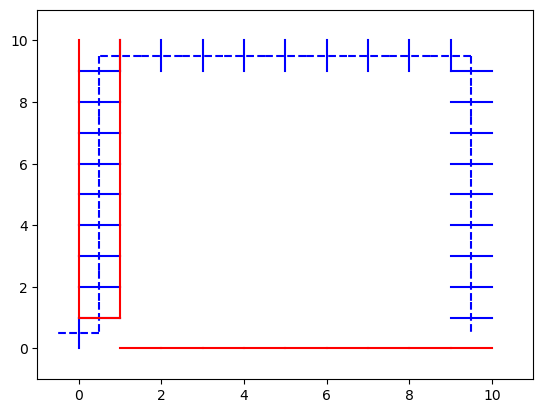

In [41]:
system = Model.system
L = system.L
nbits = system.nbits
stabilisers = centralizer_fermion.basis()

list_of_stabilisers = list(stabilisers)
fig, ax = plt.subplots()

def edge_picker(i, j, direction, system):
    """
    :param i: int, the x coordinate of the vertex
    :param j: int, the y coordinate of the vertex
    :param direction: int, the direction of the edge, 0 for horizontal, 1 for vertical
    """
    return 2*(i+j*system.L)+direction

def animate(i):
    # l.set_data(t[:i], x[:i])
    ax.cla()
    ax.set_xlim(-1, L+1)
    ax.set_ylim(-1, L+1)
    stabiliser = list_of_stabilisers[i]
    stab = list(stabiliser) # This is given as a 2nbit long touple that needs to be make into a list
    for i in range(L):
        for j in range(L):
            if stab[edge_picker(i, j, 1, system)] == 1:
                ax.plot([i, i+1], [j, j], color='blue')
                ax.plot([i+0.5, i+0.5], [j+0.5, j-0.5], color='blue', linestyle='dashed')
            if stab[edge_picker(i, j, 1, system)+nbits] == 1:
                ax.plot([i, i+1], [j, j], color='red')
            if stab[edge_picker(i, j, 0, system)] == 1:
                ax.plot([i, i], [j, j+1], color='blue')
                ax.plot([i+0.5, i-0.5], [j+0.5, j+0.5], color='blue', linestyle='dashed')
            if stab[edge_picker(i, j, 0, system)+nbits] == 1:
                ax.plot([i, i], [j, j+1], color='red')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(list_of_stabilisers))
HTML(ani.to_jshtml())

In [35]:
# now we con proceed as before

k_full = log(dimension(centralizer_full) - dimension(center_full), 2)

print(f'The {L}x{L} G_full code encodes {k_full} logical qubit(s) using {Model.system.nbits} physical qubits')


The 10x10 G_full code encodes -Infinity logical qubit(s) using 200 physical qubits


In [36]:
# now we con proceed as before

k_fermion = log(dimension(centralizer_fermion) - dimension(center_fermion), 2)

print(f'The {L}x{L} G_full code encodes {k_fermion} logical qubit(s) using {Model.system.nbits} physical qubits')

The 10x10 G_full code encodes -Infinity logical qubit(s) using 200 physical qubits


In [37]:
# now we con proceed as before

k_TC = log(dimension(centralizer_TC) - dimension(center_TC), 2)

print(f'The {L}x{L} G_full code encodes {k_TC} logical qubit(s) using {Model.system.nbits} physical qubits')

The 10x10 G_full code encodes 2 logical qubit(s) using 200 physical qubits
